In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [2]:
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9755555555555555

In [10]:
y_log_predict = log_reg.predict(X_test)

In [12]:
def TN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0)&(y_predict ==0))
TN(y_test,y_log_predict)

403

In [15]:
def FP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0)&(y_predict ==1))
FP(y_test,y_log_predict)

2

In [16]:
def FN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1)&(y_predict ==0))
FN(y_test,y_log_predict)

9

In [17]:
def TP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1)&(y_predict ==1))
TP(y_test,y_log_predict)

36

In [19]:
def confusiom_matrix(y_true,y_predict):
    return np.array([
            [TN(y_test,y_predict),FP(y_test,y_predict)],
            [FN(y_test,y_predict),TP(y_test,y_predict)],

    ])
confusiom_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]])

In [20]:
def precision(y_true,y_predict):
    try:
        return TP(y_test,y_predict)/(TP(y_test,y_predict)+FP(y_test,y_predict))
    except:
        return 0.0
precision(y_test,y_log_predict)

0.9473684210526315

In [21]:
def recall(y_true,y_predict):
    try:
        return TP(y_test,y_predict)/(TP(y_test,y_predict)+FN(y_test,y_predict))
    except:
        return 0.0
recall(y_test,y_log_predict)

0.8

### Sklearn 中的混淆矩阵,精准率与召回率


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score
precision_score(y_test,y_log_predict)

0.9473684210526315

In [24]:
from sklearn.metrics import recall_score
recall_score(y_test,y_log_predict)

0.8

In [39]:
def f1_score1(precision,recall):
    
    return 2*precision*recall/(precision + recall)

In [36]:
precision = 0.5
recall = 0.5

In [40]:
f1_score1(precision,recall)

0.5

In [41]:
precision = 0.1
recall = 0.9
f1_score1(precision,recall)

0.18000000000000002

In [42]:
precision = 0.0
recall = 1.0
f1_score1(precision,recall)

0.0

In [45]:
y_predict  = log_reg.predict(X_test)
from sklearn.metrics import f1_score
f1_score = f1_score(y_test,y_predict)

In [46]:
f1_score

0.8674698795180723

In [47]:
log_reg.decision_function(X_test)

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 , -66.25139191, -51.09600903,
       -31.49348767, -46.05335761, -38.67875653, -29.80471251,
       -37.58849546, -82.57569732, -37.81903096, -11.01165509,
        -9.17439784, -85.13004331, -16.71617974, -46.23725224,
        -5.32992784, -47.91762441, -11.66729524, -39.1960157 ,
       -25.25293243, -14.3664722 , -16.99783066, -28.91904826,
       -34.33940562, -29.47603768,  -7.85812845,  -3.82094912,
       -24.08161558, -22.16362592, -33.61218699, -23.14023293,
       -26.9180406 , -62.3893701 , -38.85690022, -66.77259733,
       -20.14482853, -17.47886658, -18.06799819, -22.22224569,
       -29.62302848, -19.73171824,   1.49552053,   8.32079827,
       -36.29307324, -42.50732725, -25.90460192, -34.98959422,
        -8.42010631, -50.04725431, -51.48208247,  19.88958588,
        -8.91888462, -31.99343636, -11.66099193,  -0.47

In [48]:
decsion_score = log_reg.decision_function(X_test)

In [49]:
np.min(decsion_score)

-85.68608522646575

In [50]:
y_predict_2 = np.array(decsion_score >= 5, dtype ='int')

In [53]:
confusiom_matrix(y_test,y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [54]:
precision_score(y_test,y_predict_2)

0.96

In [56]:
y_predict_3 = np.array(decsion_score >= -5, dtype ='int')

In [57]:
precision_score(y_test,y_predict_3)

0.7272727272727273

In [59]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decsion_score),np.max(decsion_score))
for threshold in thresholds:
    y_predict = np.array(decsion_score >= threshold, dtype = 'int')
    precisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

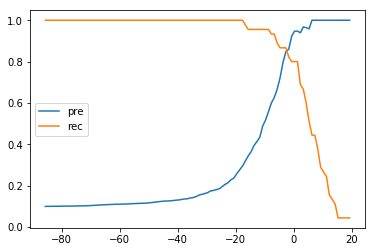

In [65]:
plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.legend(["pre","rec"])
plt.show()